In [1]:
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
# import spacy

# !python -m spacy download pt
# nlp = spacy.load('pt')

# print(spacy.__version__)


ps=PorterStemmer()

In [2]:
df = pd.read_csv("wa_ds2.txt", names=['texto'], header=None) 

In [3]:
df.head()

,texto
0,Mandei as fotos erradas
1,Para enviar as fotos
2,Pode me enviar por favor o valor e data do pri...
3,Boa tarde fiz a vistoria da placa fqp6698 fico...
4,Lia bom dia. Procedimento de vistoria deu certo?


In [4]:
# Remove Vazios
df.dropna(inplace=True)

In [27]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')
ps=PorterStemmer()

stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('https')
stopwords.append('pnt')
stopwords.append('pnt')
stopwords.append('vc')
stopwords

[nltk_data] Downloading package stopwords to /Users/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [31]:
# Unigrama

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# adiciona stopwords
b = ["o", "a", "", "e", "", ".", "?", "length", "object", "database", "de","name", "dtype","bom", "dia","boa","tarde","noite"]
stopwords.update(b)


b = ["bom_dia","boa_tarde","boa_noite"]
stopwords.update(b)

def show_wordcloud(data, title = None):
    print(data)
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=50,
        max_font_size=50, 
        scale=4,
        random_state=2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    if(len(data[1][0].split(" ")) == 1):
        fig = plt.figure(1, figsize=(16, 16))
        plt.axis('off')
        if title: 
            fig.suptitle(title, fontsize=20)
            fig.subplots_adjust(top=2.3)

        plt.imshow(wordcloud)
        plt.show()
    else:
        fig2 = plt.figure(1, figsize=(16, 16))
        plt.axis('off')
        if title: 
            fig2.suptitle(title, fontsize=20)
            fig2.subplots_adjust(top=2.3)

        plt.imshow(wordcloud)
        plt.show()      
    


In [18]:
def removePunctuation(my_str):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''   
  no_punct = ""
  for char in my_str:
    if char not in punctuations:
        no_punct = no_punct + char
  
  return no_punct

In [19]:
palavras = []
for i in df.texto:  
  for o in i.split(" "):
    if not removePunctuation(o.lower()) in stopwords:
          palavras.append( removePunctuation(o.lower() ) ) 
    

In [42]:
from collections import Counter
x = Counter(palavras)
y = x.most_common()


<class 'list'>


dar você segue meus dados oi td bem poderia informar sobre foto si está correta agora oi bia tardej ok será enviada segunda feira logo dii manhã okgrato pela atenção oi foto foi enviada favor acusar recebimento ola vc recebeu nova foto hodometro agora está correto obrigado igualmente tenha um desculpe transtorno desculpe mas não consigo acessar link httpspntvczovo atendimento partir 03012020 whatsapp é das 09h às 18h pode deixar seu recado que respondemos assim que possível ra importados agradece seu contato ok obrigada não consegui recebeu foto ok estou aguardo para confirmação fotos enviadas chegando carro aqui morando à foto foto enviada ok vou fazer aqui precisa agendar mateus catholico agradece seu contato aguarde que em breve será atendido enviado não estou conseguindo abrir link ok olá lia auto vistoria feita fotos enviadas olá agradecemos sua mensagem não estamos disponíveis momento ja enviada finalizada ok verifique por favor se deu certo manda vistoria em outro num celular 16

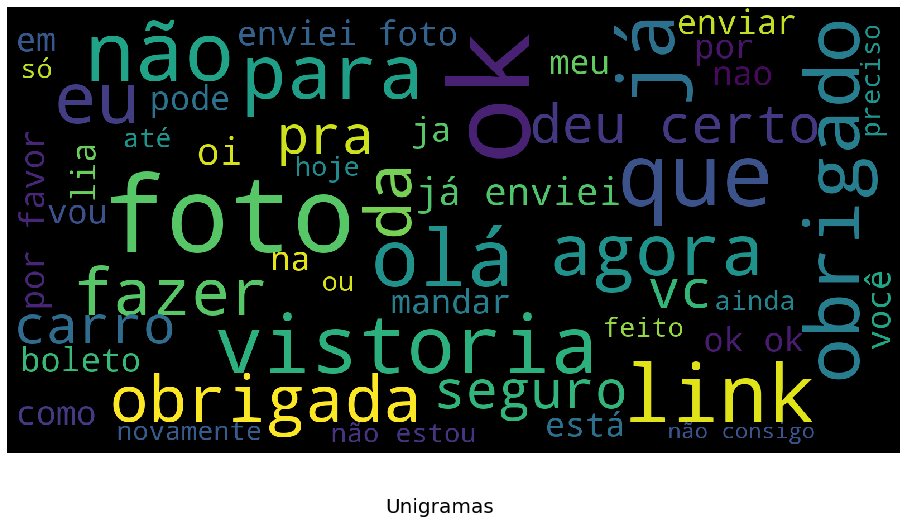

In [50]:
texto = ''
for i in palavras:
     texto = texto + ' ' + i
show_wordcloud(texto,'Unigramas')

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2))
vect.fit(df.texto)
count_vect = vect.transform(df.texto)


In [24]:
print(vect.get_feature_names())

iar agora', 'providências adotadas', 'próprio sac', 'próspero ano', 'próxima quinta', 'próximo ao', 'próximo passo', 'pt chn', 'pude atender', 'pude concluir', 'puder pode', 'puder reenviar', 'página não', 'péssimo modo', 'qcy 8368', 'qdo parar', 'qdo podemos', 'qdo quanto', 'qdo recebo', 'qdo será', 'qie vocês', 'qlq coisa', 'qoc 0617', 'qpe 7076', 'qria ver', 'qto antes', 'qua do', 'quais fotos', 'quais são', 'qual dia', 'qual foi', 'qual foto', 'qual horário', 'qual irregularidade', 'qual link', 'qual pagina', 'qual posição', 'qual prazo', 'qual previsão', 'qual problema', 'qual procedimento', 'qual próximo', 'qual status', 'qualidade que', 'qualquer coisa', 'qualquer documento', 'qualquer dúvida', 'qualquer forma', 'quando chegar', 'quando devem', 'quando eu', 'quando fica', 'quando fiz', 'quando irão', 'quando podem', 'quando que', 'quando receberei', 'quando recebo', 'quando vai', 'quando vou', 'quando vão', 'quanta dificuldade', 'quantas fotos', 'quanto antes', 'quanto eu', 'qua

In [57]:
vocab = vect.vocabulary_
count_values = count_vect.toarray().sum(axis=0)
counts = sorted([(k.replace(" ", "_"), count_values[i]) for k,i in vocab.items()])

def MyFn(a):
    return a[1]


countsNew = sorted(counts, key=MyFn, reverse = True)

# print(vocab)





AttributeError: 'list' object has no attribute 'head'

_carnes', 1), ('quem_corretor', 1), ('quem_eu', 1), ('quem_faz', 1), ('quem_mandar', 1), ('quer_abrir', 1), ('quer_as', 1), ('quer_que', 1), ('querem_foto', 1), ('querem_que', 1), ('querem_vim', 1), ('queremos_saber', 1), ('querendo_pagar', 1), ('queria_ver', 1), ('quero_saber', 1), ('qui_eu', 1), ('quinta_de', 1), ('quinta_não', 1), ('quinta_vistoria', 1), ('quirinopolis_eu', 1), ('quiser_ou', 1), ('ra_obter', 1), ('ragheb_hamade', 1), ('rapaz_disse', 1), ('rapidez_agilidade', 1), ('raul_gomes', 1), ('rc_imóveis', 1), ('re_ado', 1), ('reagendo_está', 1), ('real_no', 1), ('realizada_acusar', 1), ('realizada_através', 1), ('realizada_de', 1), ('realizada_obrigado', 1), ('realizada_prévia', 1), ('realizada_qua', 1), ('realizada_solicitação', 1), ('realizada_vistoria', 1), ('realizado_com', 1), ('realizado_pode', 1), ('realizado_vistoria', 1), ('realizados_na', 1), ('realizando_vistoria', 1), ('realizar_autovistoria', 1), ('realizar_então', 1), ('realizar_enviar', 1), ('realizar_esta', 1)

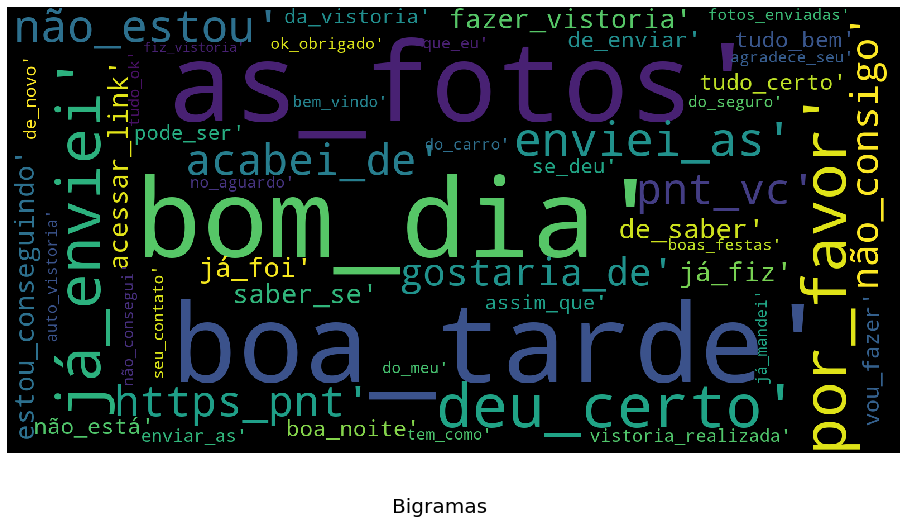

In [52]:
show_wordcloud(countsNew,'Bigramas')